In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_csv('C:\\Users\\Harshit Reddy\\Downloads\\Car details.csv')
df

,Brand,Manufacturing_year,Driven_kilometers,fuel_type,Seller_type,Transmission,Number of Owners,Price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,409999
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,110000
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,865000


In [60]:
df.shape

(4340, 8)

We have 4340 rows and 8 columns

In [61]:
df.dtypes

Brand                 object
Manufacturing_year     int64
Driven_kilometers      int64
fuel_type             object
Seller_type           object
Transmission          object
Number of Owners      object
Price                  int64
dtype: object

Here, we have object type values in brand, fuel_type, seller_type, transmission and number of owners columns and int type values in manufacturing_year, driven_kilometers and price columns. The price column is our target variable.

# To check missing values

In [62]:
df.isnull().sum()

Brand                 0
Manufacturing_year    0
Driven_kilometers     0
fuel_type             0
Seller_type           0
Transmission          0
Number of Owners      0
Price                 0
dtype: int64

Here, we have no missing values

# Summary Statistics

In [63]:
df.describe()

,Manufacturing_year,Driven_kilometers,Price
count,4340.000000,4340.000000,4.340000e+03
mean,2013.090783,66215.777419,5.041273e+05
std,4.215344,46644.102194,5.785487e+05
min,1992.000000,1.000000,2.000000e+04
25%,2011.000000,35000.000000,2.087498e+05
50%,2014.000000,60000.000000,3.500000e+05
75%,2016.000000,90000.000000,6.000000e+05
max,2020.000000,806599.000000,8.900000e+06


# To check correlation

In [64]:
dfcorr=df.corr()
dfcorr

,Manufacturing_year,Driven_kilometers,Price
Manufacturing_year,1.000000,-0.419688,0.413922
Driven_kilometers,-0.419688,1.000000,-0.192289
Price,0.413922,-0.192289,1.000000


<AxesSubplot:>

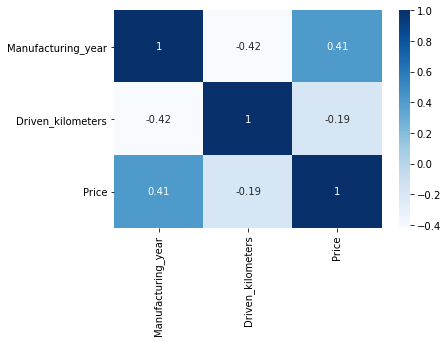

In [65]:
sns.heatmap(dfcorr,cmap='Blues',annot=True)

# EDA

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

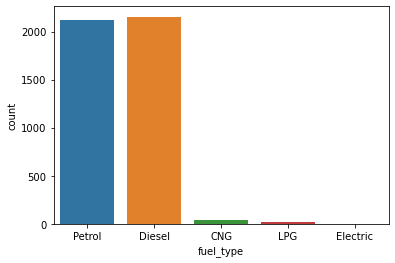

In [68]:
sns.countplot(df['fuel_type'])

From the above observations, we can say that the type of fuel the customers using Petrol are 2123, Diesel are 2153, CNG are 40, LPG are 23 and Electric are 1.

<AxesSubplot:xlabel='Seller_type', ylabel='count'>

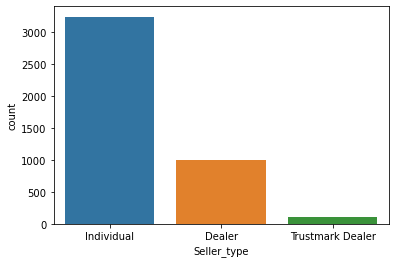

In [9]:
sns.countplot(df['Seller_type'])

From the above observations, we can say that the customers who deals with Individual are 3244, the customers who deal with Dealer are 994 and the customers who deal with Trustmark Dealer are 102.

<AxesSubplot:xlabel='Transmission', ylabel='count'>

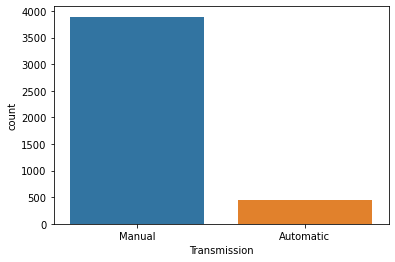

In [10]:
sns.countplot(df['Transmission'])

From the above observations, we can say that the customers who use manual cars are 3892 and automatic cars are 448.

<AxesSubplot:xlabel='Number of Owners', ylabel='count'>

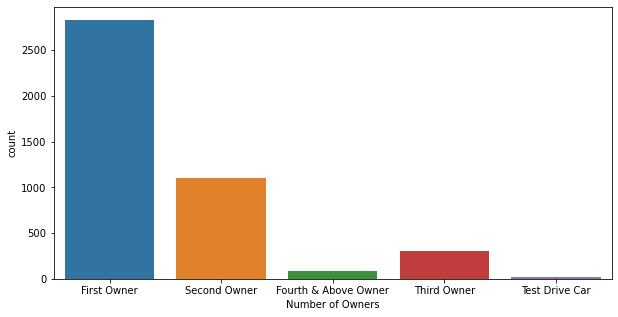

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(df['Number of Owners'])

From the above observations, we can say that the customers who were the first owner of the car are 2832, second owner of the car are 1106, third owner of the car are 304, fourth and above owner of the car are 81 and test drive car are 17.

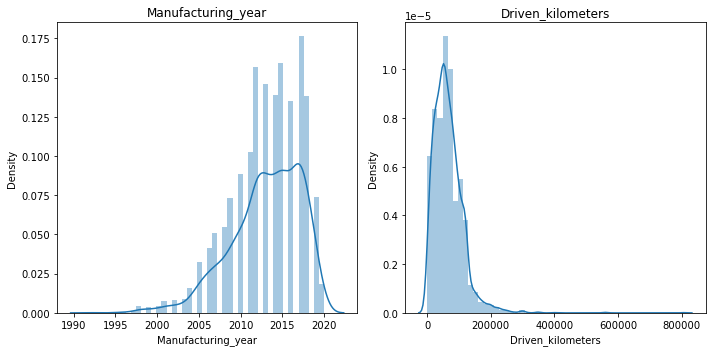

In [12]:
k=['Manufacturing_year','Driven_kilometers']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(1,2,j)
    sns.distplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()    

The datas are not distributed normally in the two columns.

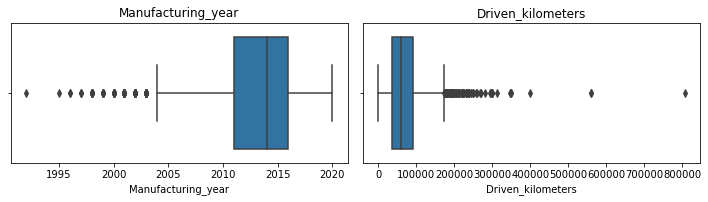

In [13]:
k=['Manufacturing_year','Driven_kilometers']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()   

There are some outliers present in these two columns.

In [14]:
y=df[['Price']]

In [15]:
df.drop('Price',axis=1,inplace=True)

In [16]:
df.skew()

Manufacturing_year   -0.833240
Driven_kilometers     2.669057
dtype: float64

There is some skewness present in the two columns. Lets remove it by applying transform.

In [17]:
df_new=df.copy(deep=True)

<AxesSubplot:xlabel='Manufacturing_year', ylabel='Density'>

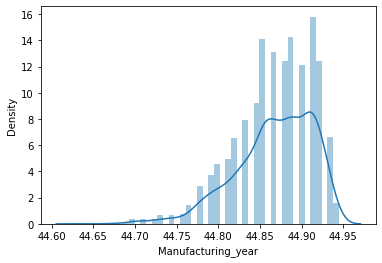

In [18]:
df_new['Manufacturing_year']=np.sqrt(df_new['Manufacturing_year'])
sns.distplot(df_new['Manufacturing_year'])

<AxesSubplot:xlabel='Driven_kilometers', ylabel='Density'>

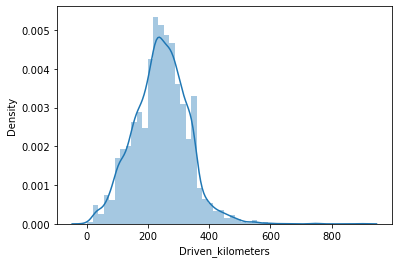

In [19]:
df_new['Driven_kilometers']=np.sqrt(df_new['Driven_kilometers'])
sns.distplot(df_new['Driven_kilometers'])

I removed the skewness in this column by applying sqrt transform.

In [20]:
df_new.skew()

Manufacturing_year   -0.836346
Driven_kilometers     0.301224
dtype: float64

Here, the skewness has been removed in driven_kilometers column where as there is some skewness present in manufacturing_year column.

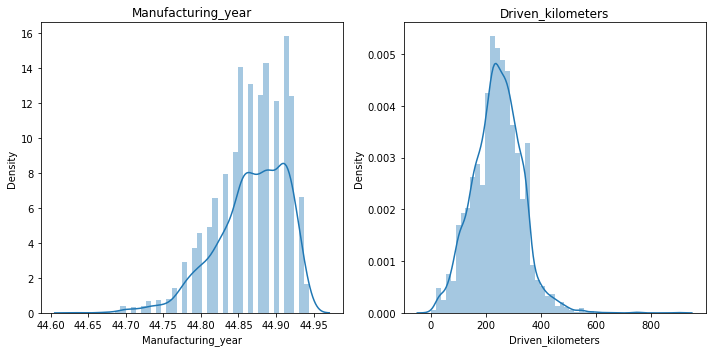

In [21]:
k=['Manufacturing_year','Driven_kilometers']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(1,2,j)
    sns.distplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout()    

The data is distributed normally in driven_kilometers where as in the other column, the data is not distributed normally.

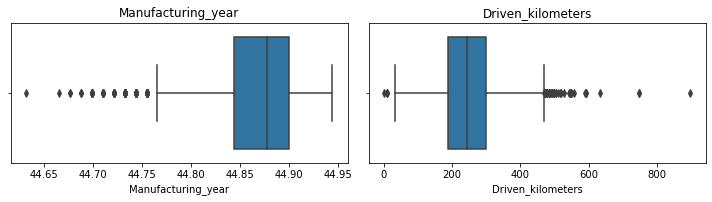

In [22]:
k=['Manufacturing_year','Driven_kilometers']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.boxplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout()    

There are some outliers present in these two columns.

In [23]:
df_new

,Brand,Manufacturing_year,Driven_kilometers,fuel_type,Seller_type,Transmission,Number of Owners
0,Maruti 800 AC,44.799554,264.575131,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,44.799554,223.606798,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,44.855323,316.227766,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,44.911023,214.476106,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,44.877611,375.499667,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),44.877611,282.842712,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,44.877611,282.842712,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,44.821870,288.097206,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,44.899889,300.000000,Diesel,Individual,Manual,First Owner


In [24]:
df_new['Price']=y['Price']
df_new

,Brand,Manufacturing_year,Driven_kilometers,fuel_type,Seller_type,Transmission,Number of Owners,Price
0,Maruti 800 AC,44.799554,264.575131,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,44.799554,223.606798,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,44.855323,316.227766,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,44.911023,214.476106,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,44.877611,375.499667,Diesel,Individual,Manual,Second Owner,450000
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),44.877611,282.842712,Diesel,Individual,Manual,Second Owner,409999
4336,Hyundai i20 Magna 1.4 CRDi,44.877611,282.842712,Diesel,Individual,Manual,Second Owner,409999
4337,Maruti 800 AC BSIII,44.821870,288.097206,Petrol,Individual,Manual,Second Owner,110000
4338,Hyundai Creta 1.6 CRDi SX Option,44.899889,300.000000,Diesel,Individual,Manual,First Owner,865000


In [25]:
df_new.drop('Brand',axis=1,inplace=True)

In [26]:
df_new.replace({'fuel_type':{'LPG':0,'Petrol':1,'Diesel':2,'CNG':3,'Electric':4}},inplace=True)

df_new.replace({'Seller_type':{'Trustmark Dealer':0,'Dealer':1,'Individual':2}},inplace=True)

df_new.replace({'Transmission':{'Automatic':0,'Manual':1}},inplace=True)

df_new.replace({'Number of Owners':{'Test Drive Car':0,'First Owner':1,'Second Owner':2,'Third Owner':3,
                                   'Fourth & Above Owner':4}},inplace=True)


In [27]:
df_new

,Manufacturing_year,Driven_kilometers,fuel_type,Seller_type,Transmission,Number of Owners,Price
0,44.799554,264.575131,1,2,1,1,60000
1,44.799554,223.606798,1,2,1,1,135000
2,44.855323,316.227766,2,2,1,1,600000
3,44.911023,214.476106,1,2,1,1,250000
4,44.877611,375.499667,2,2,1,2,450000
...,...,...,...,...,...,...,...
4335,44.877611,282.842712,2,2,1,2,409999
4336,44.877611,282.842712,2,2,1,2,409999
4337,44.821870,288.097206,1,2,1,2,110000
4338,44.899889,300.000000,2,2,1,1,865000


In [28]:
df1=df_new
df1

,Manufacturing_year,Driven_kilometers,fuel_type,Seller_type,Transmission,Number of Owners,Price
0,44.799554,264.575131,1,2,1,1,60000
1,44.799554,223.606798,1,2,1,1,135000
2,44.855323,316.227766,2,2,1,1,600000
3,44.911023,214.476106,1,2,1,1,250000
4,44.877611,375.499667,2,2,1,2,450000
...,...,...,...,...,...,...,...
4335,44.877611,282.842712,2,2,1,2,409999
4336,44.877611,282.842712,2,2,1,2,409999
4337,44.821870,288.097206,1,2,1,2,110000
4338,44.899889,300.000000,2,2,1,1,865000


In [29]:
x=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]

In [30]:
x

,Manufacturing_year,Driven_kilometers,fuel_type,Seller_type,Transmission,Number of Owners
0,44.799554,264.575131,1,2,1,1
1,44.799554,223.606798,1,2,1,1
2,44.855323,316.227766,2,2,1,1
3,44.911023,214.476106,1,2,1,1
4,44.877611,375.499667,2,2,1,2
...,...,...,...,...,...,...
4335,44.877611,282.842712,2,2,1,2
4336,44.877611,282.842712,2,2,1,2
4337,44.821870,288.097206,1,2,1,2
4338,44.899889,300.000000,2,2,1,1


In [31]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Price, Length: 4340, dtype: int64

In [32]:
x.shape

(4340, 6)

In [33]:
y.shape

(4340,)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [35]:
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred=dtr.predict(x_test)
    score=dtr.score(x_train,y_train)
    if score>maxAcc:
        maxAcc=score
        maxRS=i
print('Best score is',maxAcc,'on random state',maxRS)        

Best score is 0.9741916264333559 on random state 80


In [36]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.4520070989961956

In [37]:
pred=lm.predict(x_test)
print('predicted price is',pred)
print('Actual price is',y_test)

predicted price is [477788.88300967 767823.03848064 466391.5752891  ... 386859.4806861
 732643.05277312 835978.74921745]
Actual price is 1310    250000
1701    680000
3456    550000
756     350000
3446    130000
         ...  
1386    350000
1368    100000
2200    380000
2383    800000
2324    780000
Name: Price, Length: 1433, dtype: int64


In [38]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score is:',r2_score(y_test,pred))

193942537900.40466
229743.60466022397
Root Mean squared error: 440389.0755915781
R2_score is: 0.4424470472134028


In [39]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

0.9614351127886495

In [40]:
pred=dtr.predict(x_test)
print('predicted price is',pred)
print('Actual price is',y_test)

predicted price is [293750.         999090.81818182 334250.         ... 533333.33333333
 919999.         780000.        ]
Actual price is 1310    250000
1701    680000
3456    550000
756     350000
3446    130000
         ...  
1386    350000
1368    100000
2200    380000
2383    800000
2324    780000
Name: Price, Length: 1433, dtype: int64


In [41]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score is:',r2_score(y_test,pred))

171566078085.2008
181451.09773448232
Root Mean squared error: 414205.35738350946
R2_score is: 0.5067756951621286


In [42]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.6377219130980356

In [43]:
pred=knn.predict(x_test)
print('predicted price is',pred)
print('Actual price is',y_test)

predicted price is [ 380000.  1058999.8  317400.  ...  470000.   743999.8 1172000. ]
Actual price is 1310    250000
1701    680000
3456    550000
756     350000
3446    130000
         ...  
1386    350000
1368    100000
2200    380000
2383    800000
2324    780000
Name: Price, Length: 1433, dtype: int64


In [44]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score is:',r2_score(y_test,pred))

193147652731.3795
221394.14863921842
Root Mean squared error: 439485.6684027131
R2_score is: 0.4447322115611223


In [45]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.913689355488876

In [46]:
pred=rf.predict(x_test)
print('Predicted price is',pred)
print('Actual price is',y_test)

Predicted price is [303296.19047619 999214.87996695 342715.59126984 ... 536011.47186147
 690696.09952381 785896.38888889]
Actual price is 1310    250000
1701    680000
3456    550000
756     350000
3446    130000
         ...  
1386    350000
1368    100000
2200    380000
2383    800000
2324    780000
Name: Price, Length: 1433, dtype: int64


In [47]:
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score is:',r2_score(y_test,pred))

165264.65546762524
125582653280.9496
Root mean squared error: 354376.42878858297
R2_score is: 0.6389704913961384


These scores can be because of overfitting. Lets check wih cross validation.

# Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,x,y,cv=5)
print(score)
print(score.mean())

[0.46682055 0.50327331 0.46428282 0.35318129 0.3615934 ]
0.4298302723199737


In [49]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())

[0.42914053 0.69154273 0.66580582 0.58733673 0.29753642]
0.5342724437742252


In [50]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.5367693  0.49272458 0.61299416 0.34927439 0.17497804]
0.4333480948847672


In [51]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.6551541  0.73608989 0.77000098 0.63392758 0.36004756]
0.6310440252034133


Random forest model is working better after checking with the cross validation.

# Hyper Parameter Tuning

We use this technique to improve the accuracy of the best model that we have choosen.

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parameters={'n_estimators':[90,100,110],
            'criterion':['mse','mae'],
            'max_depth':range(2,10,2),
            'max_features':['auto','sqrt','log2']}

In [54]:
gs=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 10, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [90, 100, 110]})

In [56]:
print(gs.best_params_)

{'criterion': 'mae', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [57]:
rf_model=RandomForestRegressor(criterion='mae',max_depth=8,max_features='sqrt',n_estimators=100)
rf_model.fit(x_train,y_train)
score=rf_model.score(x_train,y_train)
print(score)

0.7776741978367332


# Saving the Model

In [74]:
import joblib
joblib.dump(rf_model,'rf_model.obj')

['rf_model.obj']